In [24]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
df['Names']=df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


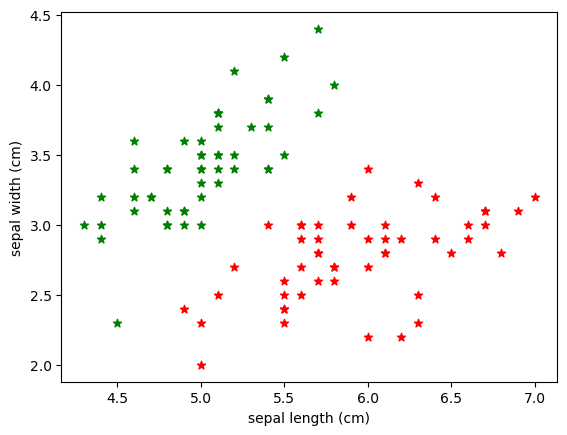

In [28]:
df_1=df[:50]
df_2=df[50:100]
df_3=df[100:]

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df_1['sepal length (cm)'],df_1['sepal width (cm)'],color='green',marker='*')
plt.scatter(df_2['sepal length (cm)'],df_2['sepal width (cm)'],color='red',marker='*')
# plt.scatter(df_3['sepal length (cm)'],df_3['sepal width (cm)'],color='blue',marker='*')



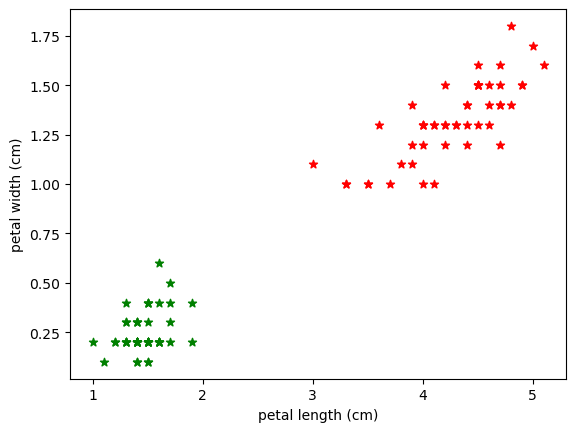

In [29]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df_1['petal length (cm)'],df_1['petal width (cm)'],color='green',marker='*')
plt.scatter(df_2['petal length (cm)'],df_2['petal width (cm)'],color='red',marker='*')

In [30]:
from sklearn.model_selection import train_test_split

x=df.drop(['target','Names'],axis='columns')
y=df.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)


1.0

In [32]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

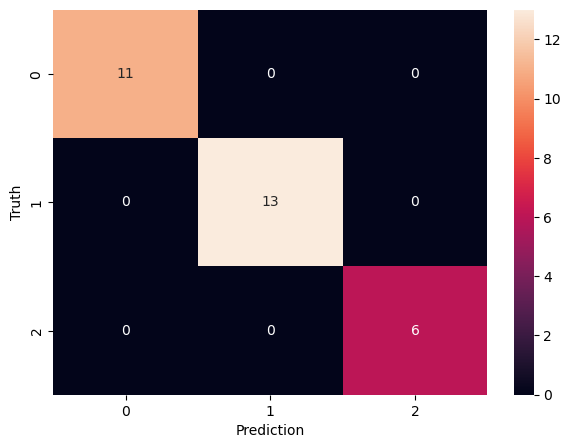

In [33]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

